In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook
plt.style.use("ggplot")
import matplotlib as mpl
mpl.rcParams['axes.facecolor'] = "white"
mpl.rcParams['axes.grid'] = 'False'
mpl.rcParams['axes.linewidth'] = '1.5'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['xtick.major.width'] = '1.0'
mpl.rcParams['ytick.major.width'] = '1.0'
mpl.rcParams['xtick.minor.width'] = '0.8'
mpl.rcParams['ytick.minor.width'] = '0.8'

# Analysis of Trajectorial Estimate for single well quartic

In [7]:
# read trajectorial estimator data
def load_data(d,gamma, n_traj):
    return np.loadtxt("quartic_dim={:03d}_gamma={:4.3f}_ntraj={:04d}.dat".format(d, gamma, n_traj))

In [8]:
# estimate Z using quadrature, removing the momentum contribution
def estimate_Z(vs, base_volume):
    dvs = 0.5*(vs[2:,1]-vs[:-2,1])
    dvs = base_volume * np.concatenate([[vs[1,1]-vs[0,1]],dvs,[vs[-1,1]-vs[-2,1]]])
    return np.sum(np.exp(-vs[:,0]) * dvs) / (np.pi)**(d/2.0)

In [9]:
def Vexact(es,d):
    emax = 2*d
    return (es/emax)**(0.75*d)

<IPython.core.display.Javascript object>


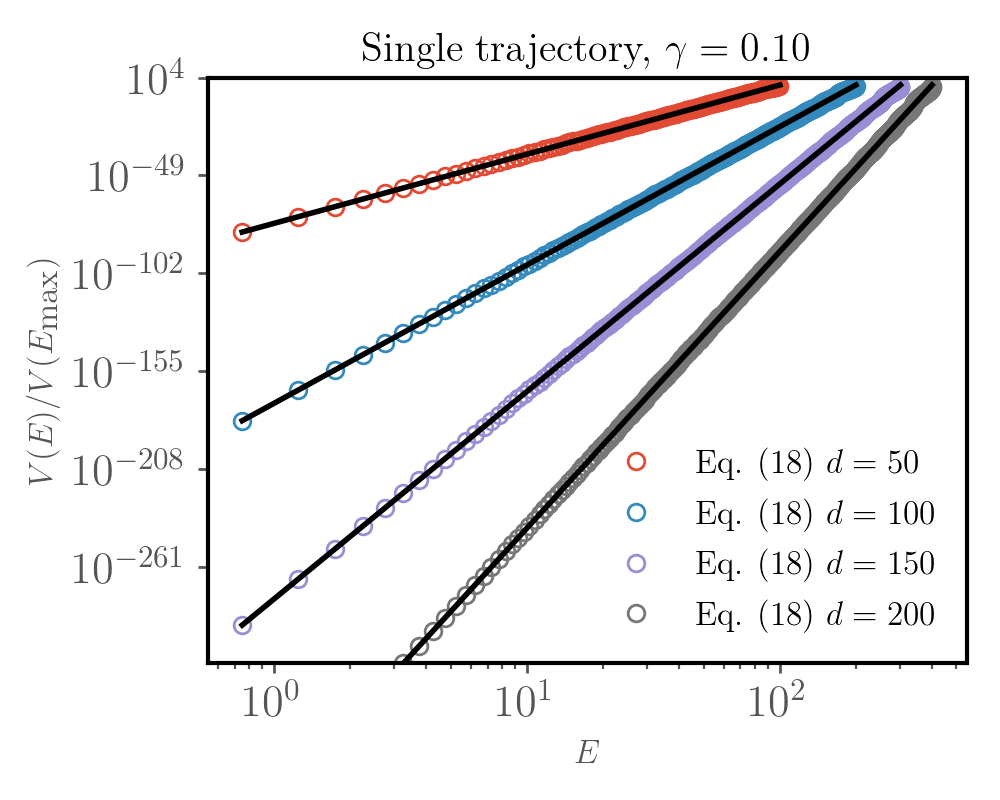

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(5,4))

gamma = 0.1
n_traj = 1
for d in range(50,250,50):
    vs = load_data(d, gamma, n_traj)
    ax1.loglog(vs[:,0], vs[:,1], "o", label=r"$\textrm{Eq. }(18)\ d=%d$"%d, markerfacecolor="None")
    ax1.loglog(vs[:,0], Vexact(vs[:,0],d), "-", color="k")
    
ax1.set_xlabel("$E$")
ax1.set_ylabel(r"$V(E)/V(E_\textrm{max})$")

ax1.set_ylim([1e-500,1e4])

fig.tight_layout()
ax1.legend(loc=0, fontsize=12, frameon=False)
ax1.set_title(r"$\textrm{Single trajectory, } \gamma=%3.2f$"%(gamma))
fig.savefig("fig01.pdf".format(d,n_traj, gamma))